#  Análisis de Datos: California Housing Prices

Este notebook realiza un análisis exploratorio del conjunto de datos de precios de viviendas en California, tomado de Kaggle:

🔗 https://www.kaggle.com/datasets/camnugent/california-housing-prices

Incluye variables como:

- `longitude`, `latitude`
- `housing_median_age`
- `total_rooms`, `total_bedrooms`
- `median_income`
- `median_house_value` (objetivo)
- `ocean_proximity` (categórica)

---


##  Limpieza y Transformación de Datos

In [2]:
# Cargar paquetes necesarios
install.packages("GGally")
library(tidyverse)
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’, ‘S7’




In [3]:
# Cargar datos
df <- read_csv("/content/housing.csv")
head(df)


Rows: 20640 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ocean_proximity
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [4]:
# Revisar estructura y valores faltantes
glimpse(df)
colSums(is.na(df))


Rows: 20,640
Columns: 10
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,…
$ total_bedrooms     <dbl> 129, 1106, 190, 235, 280, 213, 489, 687, 665, 707, …
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, …
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299…
$ ocean_proximity    <chr> "NEAR BAY", "NEAR BAY", "NEAR BAY", "NEAR BAY", "NE…


longitude           latitude housing_median_age        total_rooms 
                 0                  0                  0                  0 
    total_bedrooms         population         households      median_income 
               207                  0                  0                  0 
median_house_value    ocean_proximity 
                 0                  0

In [6]:
# Rellenar valores faltantes con la mediana
df$total_bedrooms[is.na(df$total_bedrooms)] <- median(df$total_bedrooms, na.rm = TRUE)

# One-hot encoding de ocean_proximity
df <- df %>%
  mutate(ocean_proximity = fct_lump(as.factor(ocean_proximity), n = 100)) %>%
  mutate(dummy = 1) %>%
  pivot_wider(names_from = ocean_proximity, values_from = dummy, values_fill = 0)

## 🔍 Análisis Exploratorio de Datos (EDA)

In [7]:
# Estadísticas descriptivas
summary(df)


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 297.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 536.8   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 643.2   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   Max.   :6082.0   Max.   :15.0001  
 median_house_value    NEAR BAY   

In [8]:
# Correlación con la variable objetivo
cor(df %>% select(where(is.numeric)), use = "complete.obs")["median_house_value", ]


longitude           latitude housing_median_age        total_rooms 
       -0.04596662        -0.14416028         0.10562341         0.13415311 
    total_bedrooms         population         households      median_income 
        0.04945686        -0.02464968         0.06584265         0.68807521 
median_house_value           NEAR BAY          <1H OCEAN             INLAND 
        1.00000000         0.16028448         0.25661684        -0.48485933 
        NEAR OCEAN             ISLAND 
        0.14186217         0.02341608

##  Visualización de Resultados

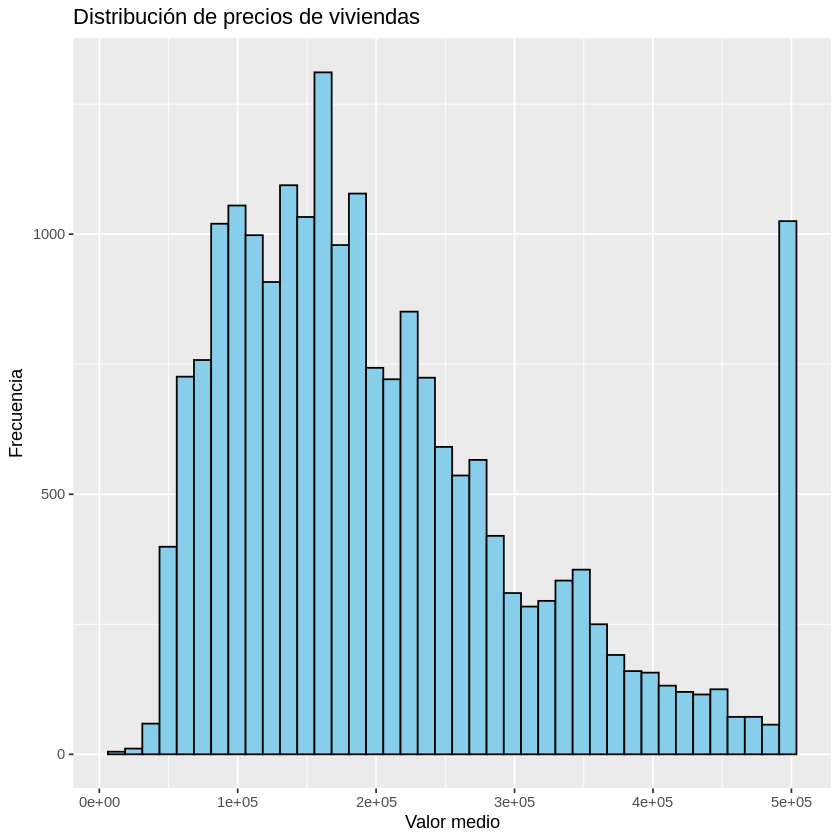

In [9]:
# Histograma de valores de viviendas
ggplot(df, aes(x = median_house_value)) +
  geom_histogram(bins = 40, fill = "skyblue", color = "black") +
  labs(title = "Distribución de precios de viviendas", x = "Valor medio", y = "Frecuencia")


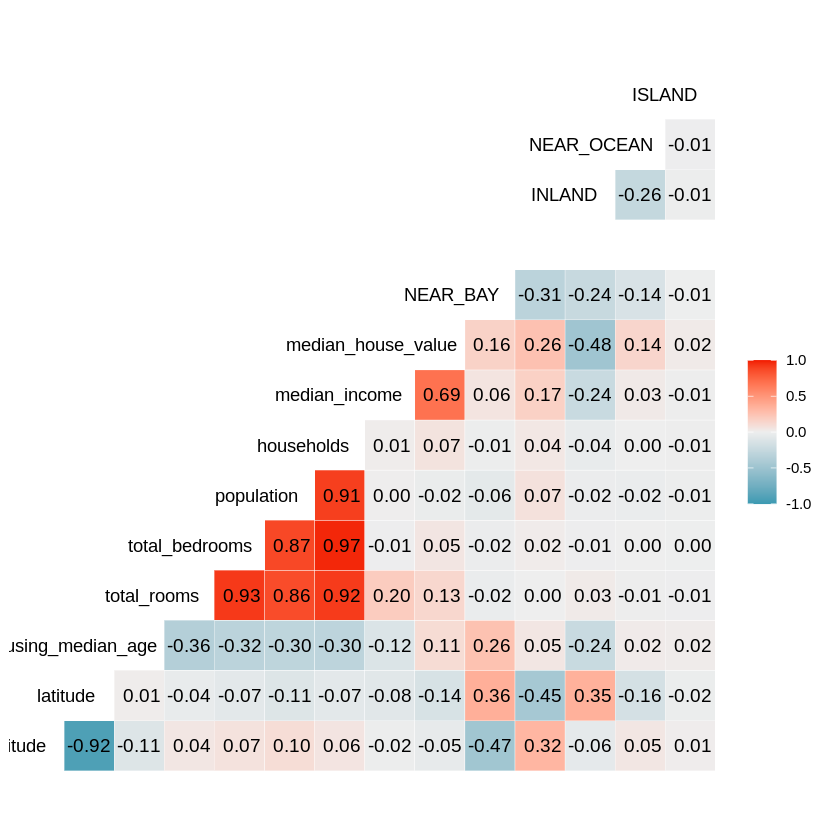

In [10]:
# Mapa de correlación
df_numeric <- df %>% select(where(is.numeric))
ggcorr(df_numeric, label = TRUE, label_round = 2, hjust = 0.9)


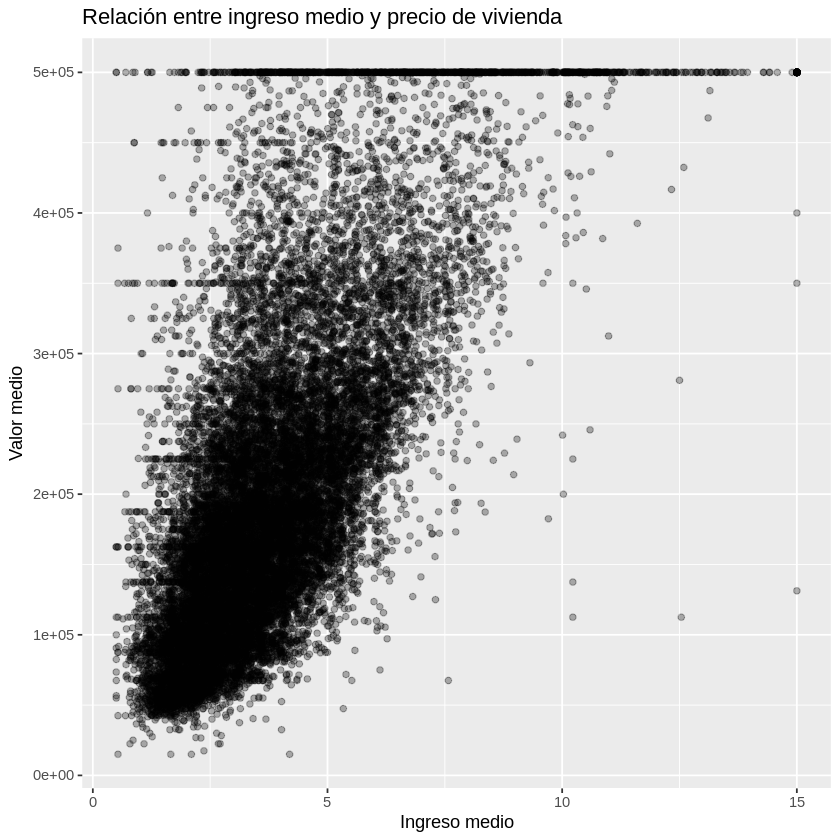

In [11]:
# Relación entre ingreso medio y valor de vivienda
ggplot(df, aes(x = median_income, y = median_house_value)) +
  geom_point(alpha = 0.3) +
  labs(title = "Relación entre ingreso medio y precio de vivienda", x = "Ingreso medio", y = "Valor medio")


##  Conclusiones

- `median_income` tiene la mayor correlación positiva con `median_house_value`.
- La mayoría de los valores están concentrados bajo los \$300,000.
- La variable categórica `ocean_proximity`, al ser codificada, puede mejorar el análisis.
- El conjunto de datos está listo para usarse en modelos de regresión u otros enfoques de predicción.

---
